Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Embarked')]

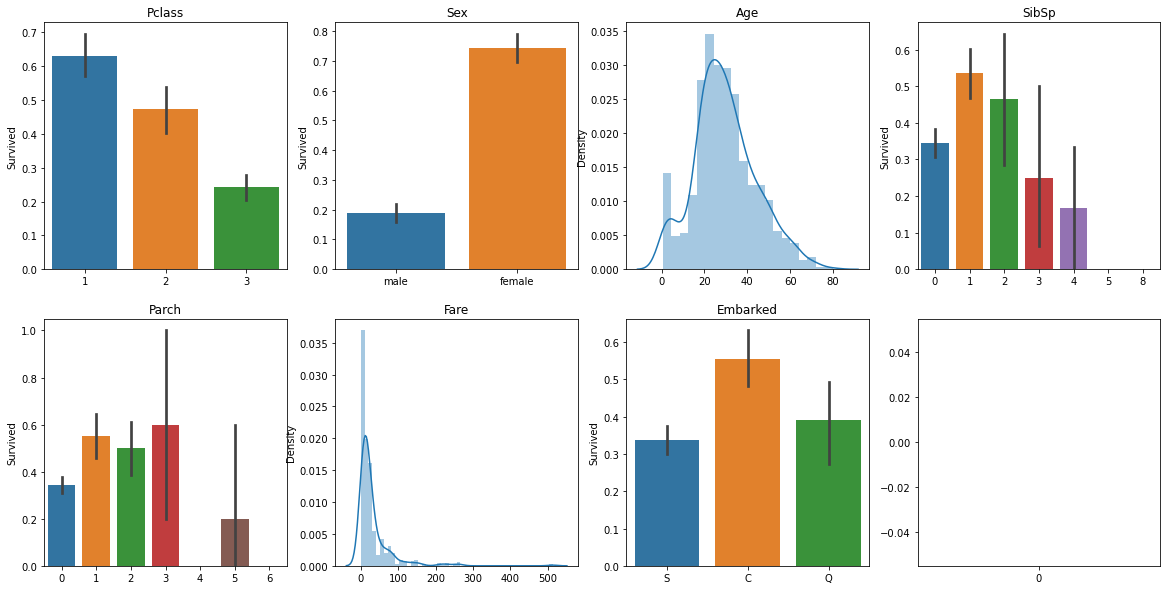

In [4]:
# 변수별 평균 생존률

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
fig.set_size_inches(20,10)

sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
sns.distplot(train['Age'], ax=ax3)
sns.barplot(x='SibSp', y='Survived',data= train, ax=ax4)
sns.barplot(x='Parch', y='Survived',data= train, ax=ax5)
sns.distplot(train['Fare'], ax=ax6)
sns.barplot(x='Embarked', y='Survived',data= train, ax=ax7)
sns.barplot(ax=ax8)

ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax5.set(xlabel='')
ax6.set(xlabel='')
ax7.set(xlabel='')

ax1.set(title='Pclass')
ax2.set(title="Sex")
ax3.set(title='Age')
ax4.set(title='SibSp')
ax5.set(title='Parch')
ax6.set(title='Fare')
ax7.set(title='Embarked')

- 1등급
- 여성
- 형제자매/배우자 1명
- 부모자녀 3명
- C 항구탑승의 생존율이 가장 높다. 

In [5]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

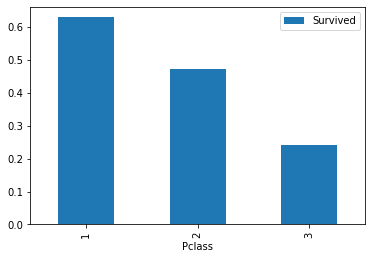

In [6]:
train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


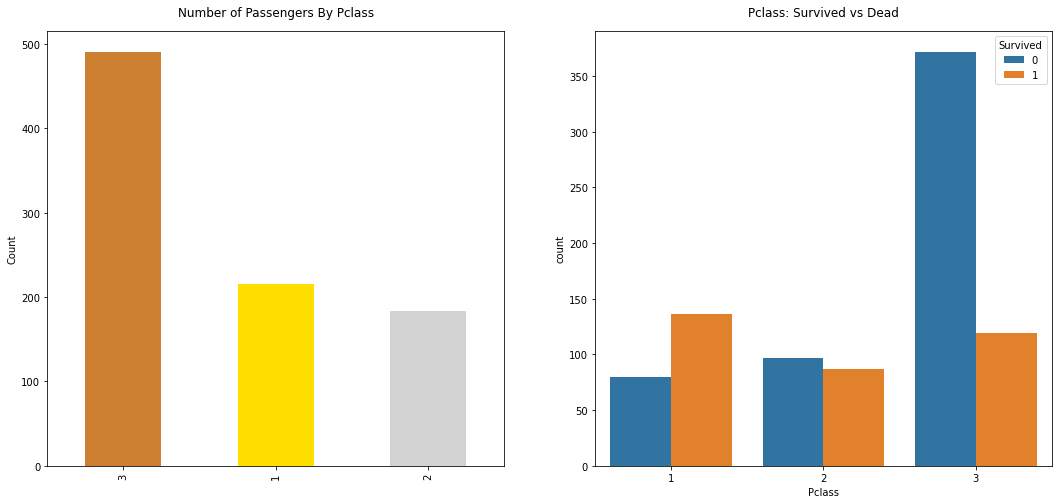

In [7]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- Pclass & Sex 

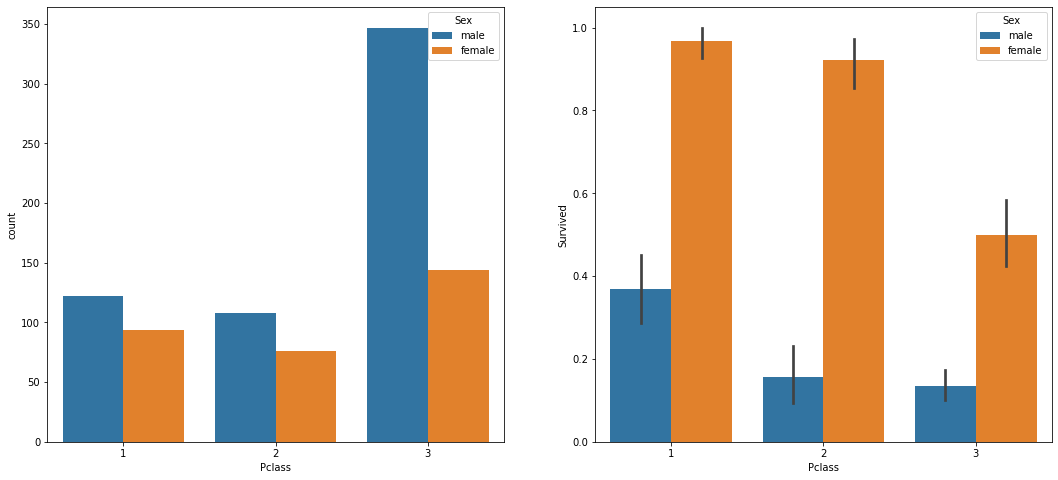

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='Pclass', data = train, hue='Sex', ax=ax[0])
sns.barplot(x='Pclass', y='Survived', data = train, hue='Sex', ax=ax[1])
plt.show()

- 모든 class에서 남성이 많이 탑승함
- 3등급이 남녀 모두 탑승객이 많음

- 모든 클래스에서 여성이 더 많이 생존
- 남녀 무관하게 class 높을수록 생존율 높아짐 

Pclass & Sex & Age

In [9]:
# AGE 

train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

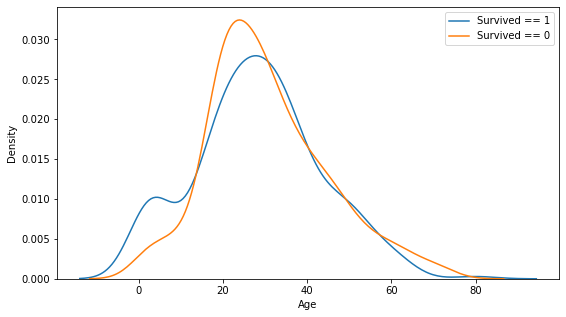

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- (1) 왜도 : 어린아이들이 많이 탑승함
- (0) 첨도 : 평균나이(29), 사망한 사람 중 평균나이에 근접한 나이가 많았음 

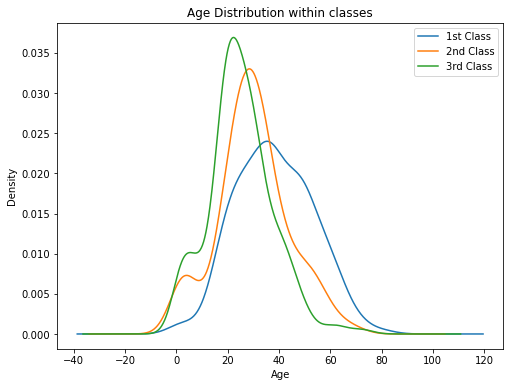

In [11]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- class가 높아질수록 나이가 많은 사람이 늘어남 

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


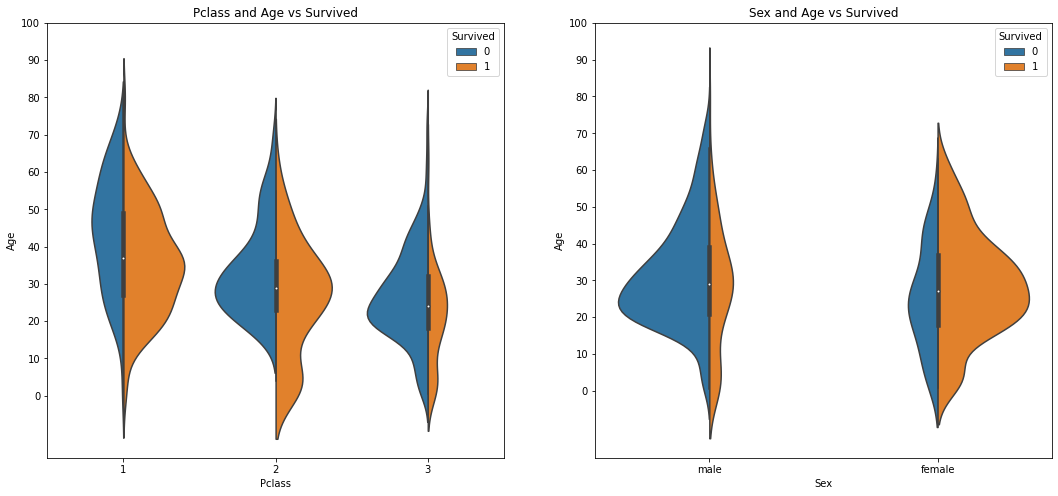

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 모든 class에서, 나이가 어리면 많이 생존
- 여성 
- 여성과 아이!

Embarked

<AxesSubplot:xlabel='Embarked'>

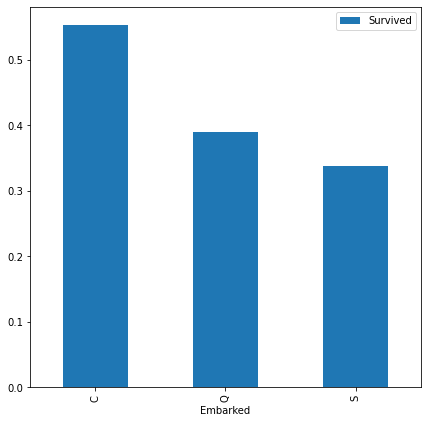

In [13]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CPB06Ga

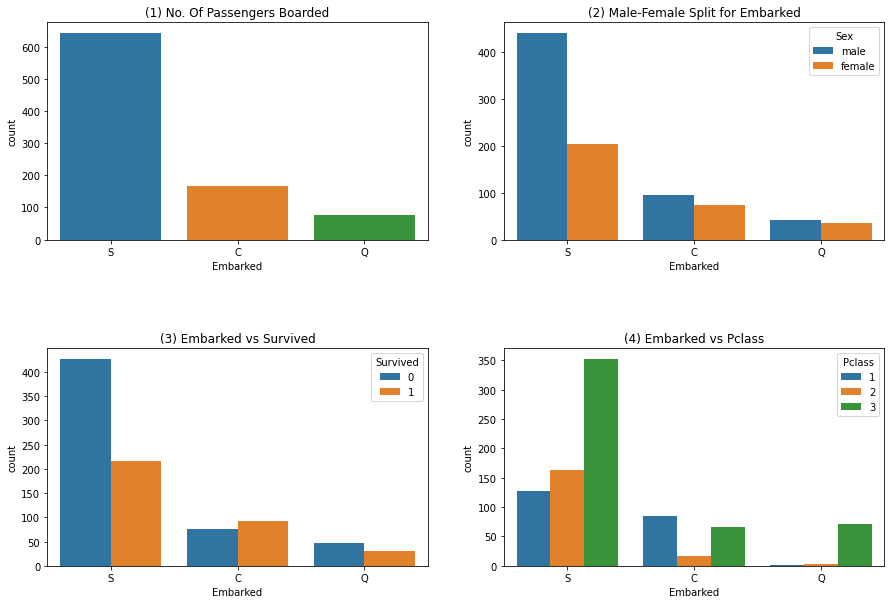

In [14]:
f,ax=plt.subplots(2, 2, figsize=(15,10))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- C - Q - S 순으로 생존율이 높음 (성별 무관)

- S에서 가장 많이 탑승 
- C, Q 남녀비율 비슷, S는 남성이 2배 이상 많다.
- S 경우 생존률이 매우 낮다. 
- S 생존률 낮은 이유 : 3class / C 생존률 높은 이유 : 1 class

Sibsp + Parch > family

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  # 본인 포함
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1     # ..

print("Maximum size of Family: ", train['FamilySize'].max())
print("Minimum size of Family: ", train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


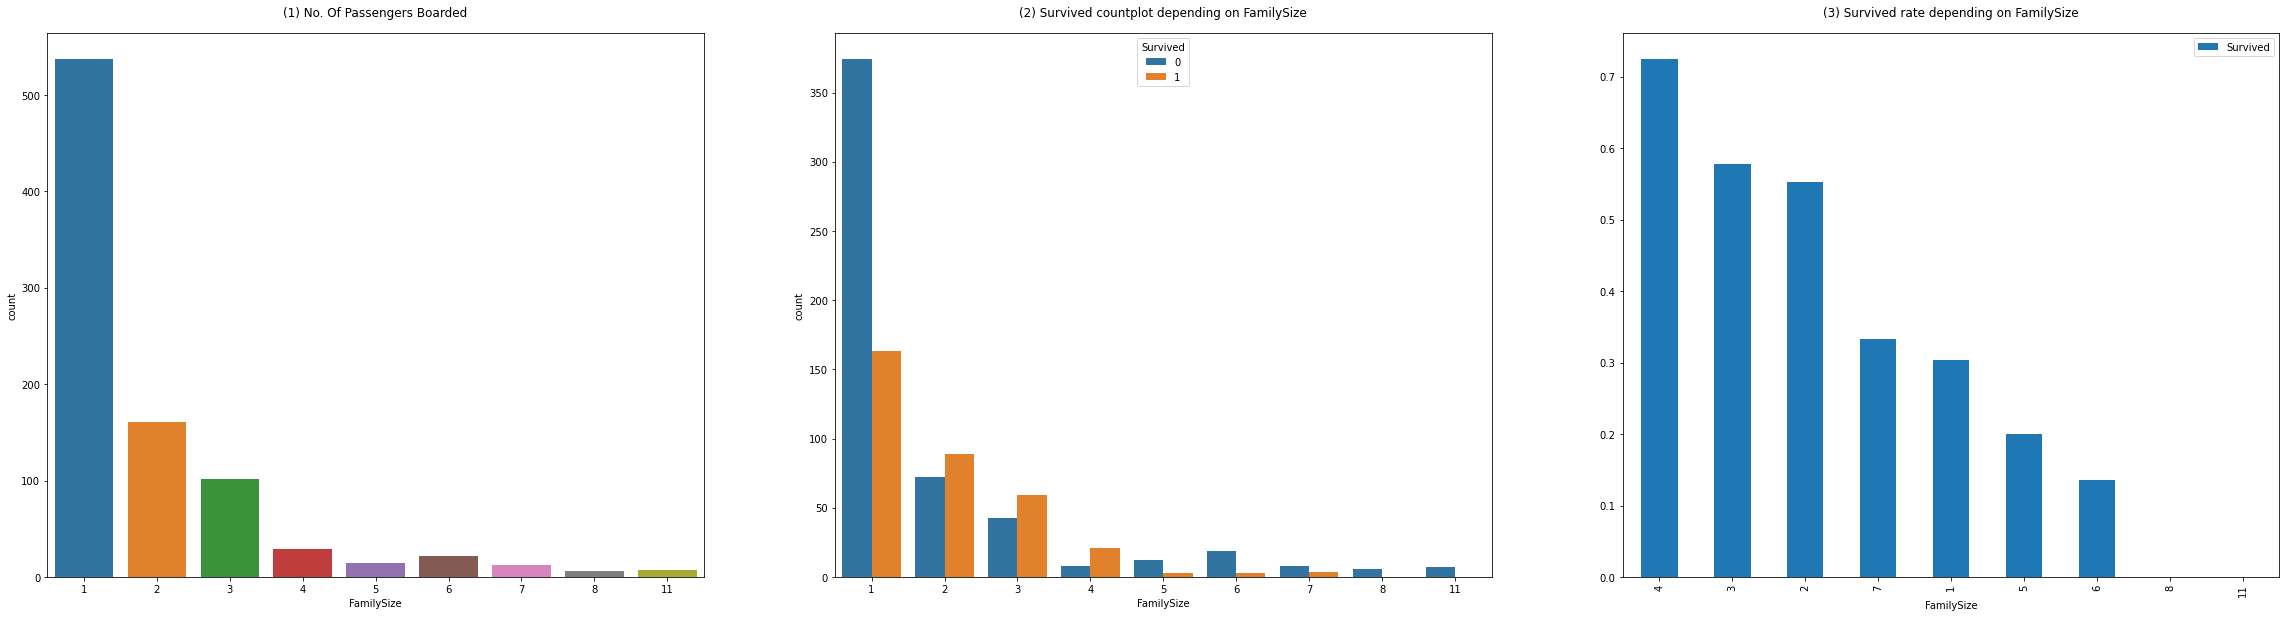

In [16]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 대부분이 혼자 탑승
- 혼자 탑승 경우 사망률이 높다 / 동행 시 생존율이 높다.(1~3)
- (해당범위 안에서) 동행가족이 늘어날 수록 생존률이 높다. (4>3>2>1)
- or 동행가족이 1~4일 때 생존률이 높다.
- 가족이 4명일 때 생존률이 가장 높다.

Fare

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


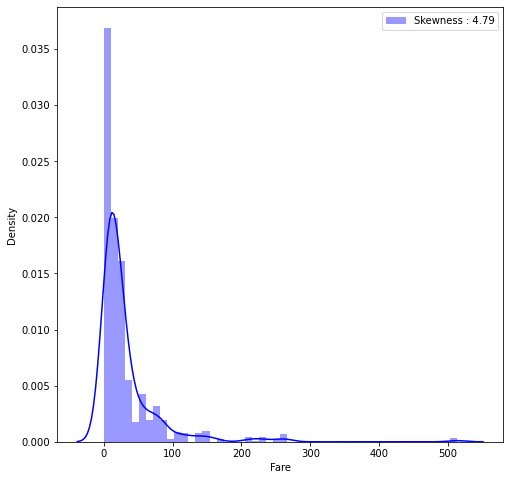

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# same
# f, ax = plt.subplots(figsize = (10, 6)) 
# sns.distplot(df_train["Fare"])

In [18]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
# 불균등한 것 같아  log를 취하고 싶지만 일단은 보류

### 데이터 전처리

In [20]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


#### 결측치 처리

##### AGE (Name > Initial> age)

In [21]:
train['Initial']= train.Name.str.extract('([A-Za-z]+)\.') 
test['Initial']= test.Name.str.extract('([A-Za-z]+)\.') 

In [22]:
# initial & sex 
train['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Sir           1
Mme           1
Ms            1
Capt          1
Lady          1
Countess      1
Don           1
Name: Initial, dtype: int64

In [23]:
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [24]:
mr = ['Mr', 'Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Mayor', 'Mr', 'Rev', 'Sir']
ms = ['Master']
mrs = ['Countess', 'Lady', 'Mme', 'Ms', 'Mrs']
miss = ['Miss', 'Mlle']

train['Initial'] = train['Initial'].apply(lambda x : 'Mr' if x in mr else 'Master' if x in ms else 'Mrs' if x in mrs else 'Miss' if x in miss  else 'Other')  
test['Initial'] = test['Initial'].apply(lambda x : 'Mr' if x in mr else 'Master' if x in ms else 'Mrs' if x in mrs else 'Miss' if x in miss  else 'Other')   

In [25]:
train.groupby('Initial').mean()['Survived'].sort_values(ascending = False)

Initial
Mrs       0.798450
Miss      0.701087
Master    0.575000
Other     0.500000
Mr        0.160448
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Initial'>

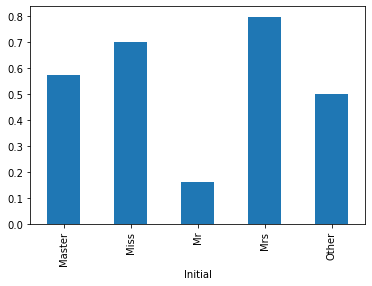

In [26]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [27]:
train.groupby('Initial').mean()['Age']

Initial
Master     4.574167
Miss      21.804054
Mr        32.948317
Mrs       35.803571
Other     48.500000
Name: Age, dtype: float64

In [28]:
ini = [ 'Mr', 'Mrs', 'Master', 'Miss', 'Other']
age = [33,36,5,22,46]

for i in ini:
  for j in age:
    train.loc[(train.Age.isnull())&(train.Initial==i),'Age'] = j
    test.loc[(test.Age.isnull())&(test.Initial==i),'Age'] = j

##### Embarked / Fare > mode

In [29]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

train['Fare'].fillna(8.05, inplace=True)
test['Fare'].fillna(8.05, inplace=True)

#### 문자형 > 숫자형 매핑

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [31]:
train['Initial'] = train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
test['Initial'] = test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

#### 변수 상관관계 

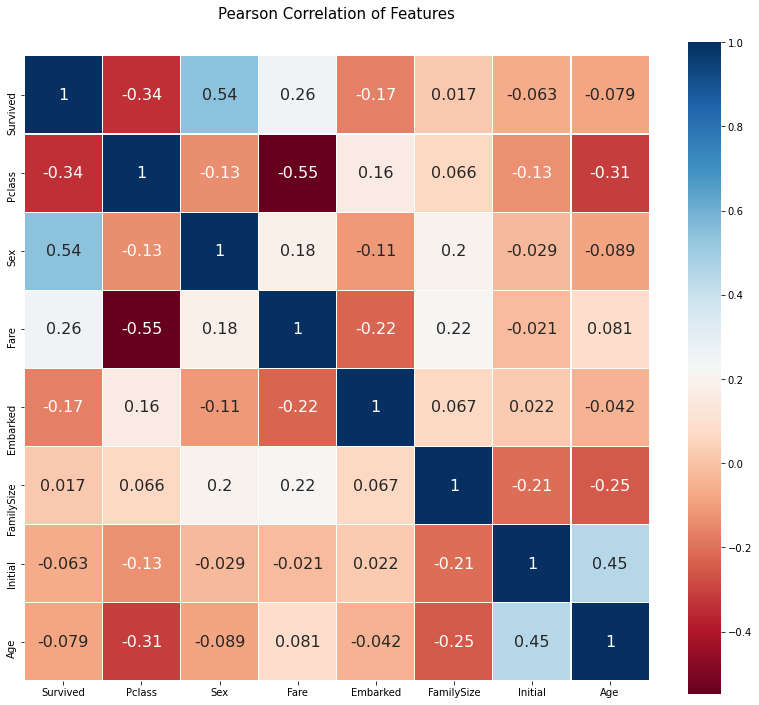

In [32]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

#### 범주 나누기

히트맵을 통해 age와 survived의 상관계수는 -0.079로 상당히 낮음을 알 수 있다. 다양한 범주로 age_cat을 생성하여 상관계수를 다시 살펴보도록 한다. 

- 1. 10살 기준 (cut)
- 2. 동일 갯수 (qcut)
- 3. 16세부터 성인으로 간주하여 5살 기준 자르기 


In [33]:
# # 1 

# def category_age(x):
#     if x < 10:
#         return 0
#     elif x < 20:
#         return 1
#     elif x < 30:
#         return 2
#     elif x < 40:
#         return 3
#     elif x < 50:
#         return 4
#     elif x < 60:
#         return 5
#     elif x < 70:
#         return 6
#     else:
#         return 7    
    
# train['Age_cat'] = train['Age'].apply(category_age)
# test['Age_cat'] = test['Age'].apply(category_age)



# # 2 qcut(갯수) 

# train['Age_cat2'] = pd.qcut(train['Age'], 6, labels = [1,2,3,4,5,6])
# test['Age_cat2'] = pd.qcut(test['Age'], 6, labels = [1,2,3,4,5,6])


# # 2-1 cut(길이)

# train['Age_cat22'] = pd.cut(train['Age'], 6, labels = [1,2,3,4,5,6])
# test['Age_cat22'] = pd.cut(test['Age'], 6, labels = [1,2,3,4,5,6])



# # 3 16세~ 성인 간주 

# def category_age3(x):
#     if x < 5 :
#        return 1
#     if 5<=x<10:
#        return 2
#     if 10<=x<16:
#        return 3
#     if 16<=x<20:
#        return 4     
#     if 20<=x<25:
#        return 5
#     if 25<=x<30:
#        return 6
#     if 30<=x<35:
#        return 7
#     if 35<=x<40:
#        return 8
#     if 40<=x<45:
#        return 9
#     if 45<=x<50:
#        return 10
#     if 50<=x<55:
#        return 11
#     if 55<=x<60:
#        return 12
#     if 60<=x<65:
#        return 13
#     if 65<=x<70:
#        return 14
#     if 70<=x<75:
#        return 15
#     if 75<=x:
#        return 15


# train['Age_cat3'] = train['Age'].apply(category_age3)
# test['Age_cat3'] = test['Age'].apply(category_age3)






#### 새 변수 생성

In [34]:
# familysize 있음 

다양한 방법으로 age 범주를 나누어 봤지만 survived와의 상관관계는 보이지 않습니다. 이번에는 age 변수를 성별을 기준으로 두 개로 나눕니다. 나누기 전 상관계수 0.079던 성별 변수가 -0.52(age_0), 0.49(age_1)로 높아졌습니다.

##### Age with Sex

In [35]:
train[['Age','Sex']].groupby('Sex').describe()

Age                                                    
     count       mean        std   min   25%   50%   75%   max
Sex                                                           
0    577.0  31.215199  13.036164  0.42  23.0  33.0  35.0  80.0
1    314.0  28.773885  13.000838  0.75  21.0  30.0  35.0  63.0

In [36]:
train['Age_0'] = train['Age'][train['Sex']==1]
train['Age_1'] = train['Age'][train['Sex']==0]

test['Age_0'] = test['Age'][test['Sex']==1]
test['Age_1'] = test['Age'][test['Sex']==0]

In [37]:
train['Age_0']=train['Age_0'].fillna(99)
train['Age_1']=train['Age_1'].fillna(99)

test['Age_0']=test['Age_0'].fillna(99)
test['Age_1']=test['Age_1'].fillna(99)

In [38]:
# 범주 나눠주기 

# 1    
    
# train['Age0_cat'] = train['Age_0'].apply(category_age)
# test['Age0_cat'] = test['Age_0'].apply(category_age)
# train['Age1_cat'] = train['Age_1'].apply(category_age)
# test['Age1_cat'] = test['Age_1'].apply(category_age)

# # 3

# train['Age0_cat3'] = train['Age_0'].apply(category_age3)
# test['Ag0e_cat3'] = test['Age_0'].apply(category_age3)

# train['Age1_cat3'] = train['Age_1'].apply(category_age3)
# test['Ag01_cat3'] = test['Age_1'].apply(category_age3)



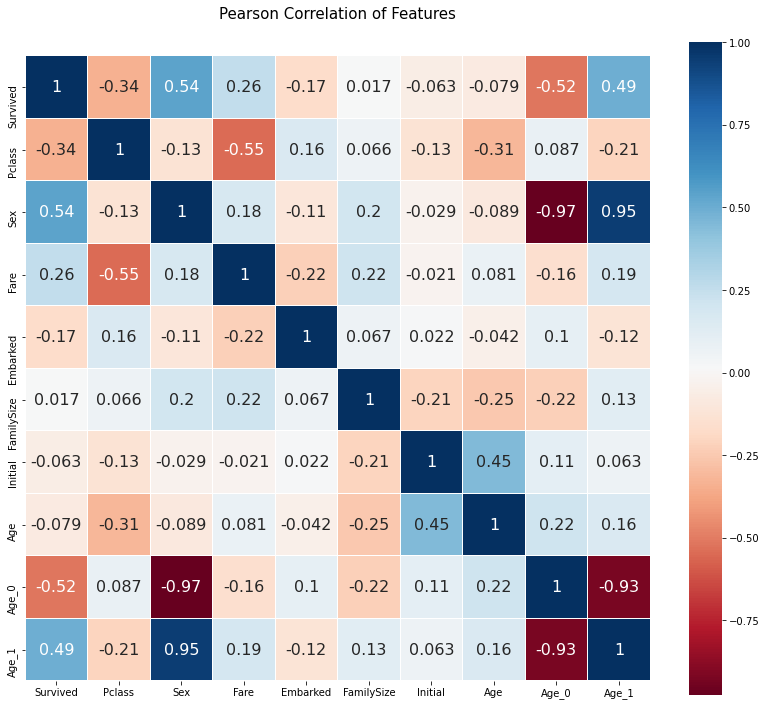

In [39]:
_# 히트맵 다시 그리기 

heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age', 'Age_0', 'Age_1']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

#### 필요 없는 변수 drop

In [40]:
train = train.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age', 'PassengerId'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age'], axis=1)

In [41]:
train.head(10)

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1
0,0,3,0,7.2500,2,2,2,99.0,22.0
1,1,1,1,71.2833,0,2,3,38.0,99.0
2,1,3,1,7.9250,2,1,1,26.0,99.0
3,1,1,1,53.1000,2,2,3,35.0,99.0
4,0,3,0,8.0500,2,1,2,99.0,35.0
5,0,3,0,8.4583,1,1,2,99.0,33.0
6,0,1,0,51.8625,2,1,2,99.0,54.0
7,0,3,0,21.0750,2,5,0,99.0,2.0
8,1,3,1,11.1333,2,3,3,27.0,99.0
9,1,2,1,30.0708,0,2,3,14.0,99.0


In [42]:
test.head(1)

,PassengerId,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1
0,892,3,0,7.8292,1,1,2,99.0,34.5


#### 원핫 인코딩

In [43]:
train['Initial'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [44]:
# embarked / initial

pd.get_dummies(train['Embarked'], prefix='Embarked')
pd.get_dummies(test['Embarked'], prefix='Embarked')


,Embarked_0,Embarked_1,Embarked_2
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [45]:
train=pd.concat([train, pd.get_dummies(train['Initial'], prefix='Initial')], axis=1) 
train
#pd.get_dummies(train['Initial'], prefix='Initial')
#pd.get_dummies(test['Initial'], prefix='Initial')

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,0,3,0,7.2500,2,2,2,99.0,22.0,0,0,1,0,0
1,1,1,1,71.2833,0,2,3,38.0,99.0,0,0,0,1,0
2,1,3,1,7.9250,2,1,1,26.0,99.0,0,1,0,0,0
3,1,1,1,53.1000,2,2,3,35.0,99.0,0,0,0,1,0
4,0,3,0,8.0500,2,1,2,99.0,35.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,13.0000,2,1,2,99.0,27.0,0,0,1,0,0
887,1,1,1,30.0000,2,1,1,19.0,99.0,0,1,0,0,0
888,0,3,1,23.4500,2,4,1,33.0,99.0,0,1,0,0,0
889,1,1,0,30.0000,0,1,2,99.0,26.0,0,0,1,0,0


In [46]:
test=pd.concat([test, pd.get_dummies(test['Initial'], prefix='Initial')], axis=1) 
test

,PassengerId,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,892,3,0,7.8292,1,1,2,99.0,34.5,0,0,1,0,0
1,893,3,1,7.0000,2,2,3,47.0,99.0,0,0,0,1,0
2,894,2,0,9.6875,1,1,2,99.0,62.0,0,0,1,0,0
3,895,3,0,8.6625,2,1,2,99.0,27.0,0,0,1,0,0
4,896,3,1,12.2875,2,3,3,22.0,99.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,8.0500,2,1,2,99.0,33.0,0,0,1,0,0
414,1306,1,1,108.9000,0,1,4,39.0,99.0,0,0,0,0,1
415,1307,3,0,7.2500,2,1,2,99.0,38.5,0,0,1,0,0
416,1308,3,0,8.0500,2,1,2,99.0,33.0,0,0,1,0,0


In [47]:
train=pd.concat([train, pd.get_dummies(train['Embarked'], prefix='Embarked')], axis=1) 
train

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,0,7.2500,2,2,2,99.0,22.0,0,0,1,0,0,0,0,1
1,1,1,1,71.2833,0,2,3,38.0,99.0,0,0,0,1,0,1,0,0
2,1,3,1,7.9250,2,1,1,26.0,99.0,0,1,0,0,0,0,0,1
3,1,1,1,53.1000,2,2,3,35.0,99.0,0,0,0,1,0,0,0,1
4,0,3,0,8.0500,2,1,2,99.0,35.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,13.0000,2,1,2,99.0,27.0,0,0,1,0,0,0,0,1
887,1,1,1,30.0000,2,1,1,19.0,99.0,0,1,0,0,0,0,0,1
888,0,3,1,23.4500,2,4,1,33.0,99.0,0,1,0,0,0,0,0,1
889,1,1,0,30.0000,0,1,2,99.0,26.0,0,0,1,0,0,1,0,0


In [48]:
test=pd.concat([test, pd.get_dummies(test['Embarked'], prefix='Embarked')], axis=1) 
test

,PassengerId,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,0,7.8292,1,1,2,99.0,34.5,0,0,1,0,0,0,1,0
1,893,3,1,7.0000,2,2,3,47.0,99.0,0,0,0,1,0,0,0,1
2,894,2,0,9.6875,1,1,2,99.0,62.0,0,0,1,0,0,0,1,0
3,895,3,0,8.6625,2,1,2,99.0,27.0,0,0,1,0,0,0,0,1
4,896,3,1,12.2875,2,3,3,22.0,99.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,8.0500,2,1,2,99.0,33.0,0,0,1,0,0,0,0,1
414,1306,1,1,108.9000,0,1,4,39.0,99.0,0,0,0,0,1,1,0,0
415,1307,3,0,7.2500,2,1,2,99.0,38.5,0,0,1,0,0,0,0,1
416,1308,3,0,8.0500,2,1,2,99.0,33.0,0,0,1,0,0,0,0,1


In [49]:
train.head(1)

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_0,Age_1,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,0,7.25,2,2,2,99.0,22.0,0,0,1,0,0,0,0,1


#### 모델

전처리 평가를 위한 간이 모델입니다. 

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [51]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 16), (891,), (418, 16))

In [52]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.27

In [53]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Initial_0,1.425474
1,Sex,1.174252
11,Initial_3,0.863214
13,Embarked_0,0.858853
9,Initial_1,0.230457
14,Embarked_1,0.205189
3,Embarked,0.191442
2,Fare,0.005066
7,Age_1,0.003803
6,Age_0,0.003471


In [54]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.9

In [55]:
# Knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.09

In [56]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.24

In [57]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.32

In [58]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.32

In [59]:
# XGBoost

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb

C:\Users\CPB06GameN\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


95.96

In [60]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('xgb.csv', index=False)